# Считывание данных

In [276]:
import pandas as pd
import numpy as np
from sklearn import linear_model

features = 54
train_object_size = 20000
test_object_size = 30000
read_object_size = train_object_size + test_object_size

train_object = np.zeros((train_object_size, features))
train_ans = np.zeros(train_object_size)

test_object = np.zeros((test_object_size, features)) 
test_ans = np.zeros(test_object_size)

f = open('covtype.libsvm.binary.scale')
line_num = 0
for line in f:
    if (line_num == read_object_size):
        break
    line_object = line.split()
    len_line_object = len(line_object)
    for i in range(1, len_line_object):
        current_cell = line_object[i].split(':')
        current_num_feature = int(current_cell[0]) - 1
        current_feature = float(current_cell[1])
        bin_class = int(line_object[0])
        if (bin_class == 2):
            bin_class = -1
        if (line_num < train_object_size):
            train_ans[line_num] = bin_class
            train_object[line_num][current_num_feature] = current_feature
        else:
            test_ans[line_num - train_object_size] = bin_class
            test_object[line_num - train_object_size][current_num_feature] = current_feature
    line_num += 1
f.close()
print("Данные считались успешно!")

Данные считались успешно!


# Обучение моделей

In [184]:
class1 = sum([int(train_ans[i] == 1) for i in range(train_object_size)]) #Посмотрим на соотношение классов в train.
class2 = sum([int(train_ans[i] == -1) for i in range(train_object_size)])
print("Количество первого класса в train = {0}, количество второго класса в train = {1}".format(class1, class2))

Количество первого класса в train = 13978, количество второго класса в train = 6022


In [185]:
class1 = sum([int(test_ans[i] == 1) for i in range(test_object_size)])
                                                                            #Посмотрим на соотношение классов в test.
class2 = sum([int(test_ans[i] == -1) for i in range(test_object_size)])
print("Количество первого класса в test = {0}, количество второго класса в test = {1}".format(class1, class2))

Количество первого класса в test = 7229, количество второго класса в test = 22771


## Логистическая регрессия

In [186]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [288]:
from numpy import linalg
import matplotlib.pyplot as plt
import copy
import time
%matplotlib inline

def logistic_loss(w, *args):
    X, y = args
    objects_size = y.shape[0]
    return sum([np.log(1 + np.exp(-y[i]*np.dot(X[i], w))) for i in range(objects_size)])

def grad_logistic_loss(w, *args):
    X, y = args
    objects_size = y.shape[0]
    return sum([-y[i]*X[i]/(1 + np.exp(y[i]*np.dot(X[i], w))) for i in range(objects_size)])

def hessian_logistic_loss(w, *args):
    X, y = args
    objects_size = y.shape[0]
    features = X.shape[1]
    ans = np.zeros((features, features))
    for i in range(objects_size):
        ans += np.exp(y[i]*np.dot(X[i], w))/((1 + np.exp(y[i]*np.dot(X[i], w)))**2)*np.dot(X[i].reshape(-1, 1),
                                                                X[i].reshape(1, -1))
    return ans

def L3_upper_bound(X):
    return 1/10*sum([linalg.norm(X[i])**3 for i in range(X.shape[0])])
  
def L2_upper_bound(X):
    return 1/4*sum([linalg.norm(X[i])**2 for i in range(X.shape[0])])

In [227]:
train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
test_const_feature = np.array([np.array([1]) for i in range(test_object_size)])

train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))

test_extended_object = copy.deepcopy(test_object)
test_extended_object = np.column_stack((test_extended_object, test_const_feature[:, 0]))

train_extended_object.shape

(20000, 55)

iter = 0


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 1


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 2


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 3


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 4


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 5


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 6


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 7


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 8


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 9


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 10


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 11


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 12


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 13


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 14


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 15


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 16


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 17


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 18


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 19


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 20


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 21


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 22


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 23


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


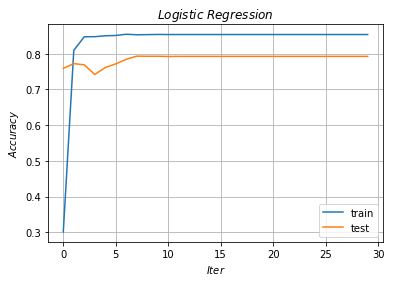

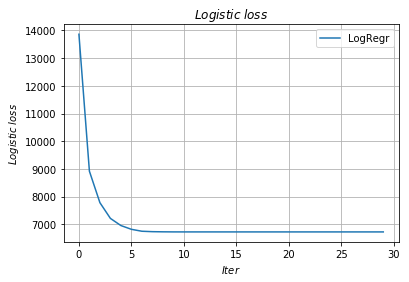

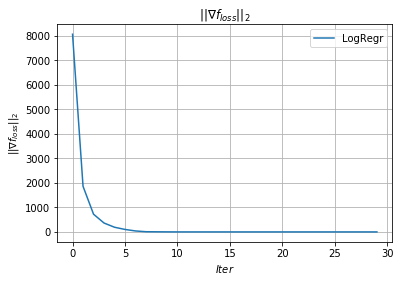

In [235]:
max_iter = 30 

accuracy_array_train = np.zeros(max_iter)
accuracy_array_test = np.zeros(max_iter)
logistic_loss_train = np.zeros(max_iter)
norm_grad_loss_train = np.zeros(max_iter)

for i in range(max_iter):
    print("iter = {0}".format(i))
    log_reg = LogisticRegression(solver = 'liblinear', tol = 1e-10, C = 100000000, max_iter = i)
    log_reg.fit(train_object, train_ans)
    
    coef = log_reg.coef_
    bias = log_reg.intercept_
    coef = np.append(coef, bias)

    train_args = (train_extended_object, train_ans)
    logistic_loss_train[i] = logistic_loss(coef, *train_args)
    norm_grad_loss_train[i] = linalg.norm(grad_logistic_loss(coef, *train_args))
    
    train_ans_predict = log_reg.predict(train_object)
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train[i] = accuracy_train

    test_ans_predict = log_reg.predict(test_object)
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test[i] = accuracy_test

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$Logistic \; Regression$') 
plt.plot([i for i in range(max_iter)], accuracy_array_train, label = 'train')
plt.plot([i for i in range(max_iter)], accuracy_array_test, label = 'test')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_logistic_regr.pdf')

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Logistic \; loss$') 
plt.title(r'$Logistic \; loss$') 
plt.plot([i for i in range(max_iter)], logistic_loss_train, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('logistic_loss_log_regr.pdf')
plt.show()

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$||\nabla f_{loss}||_2$') 
plt.title(r'$||\nabla f_{loss}||_2$') 
plt.plot([i for i in range(max_iter)], norm_grad_loss_train, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('grad_log_loss_log_regr.pdf')
plt.show()

# БГМ 

iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


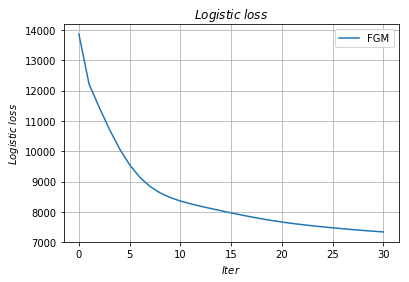

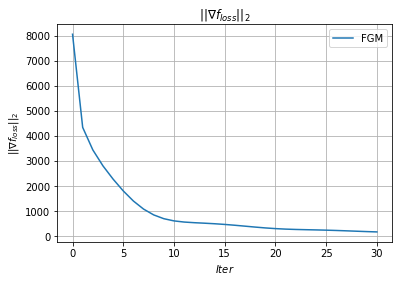

In [232]:
import matplotlib.pyplot as plt
import copy
import time
%matplotlib inline

def FGM_iter(NumIter, x0, f, gradf, *args):
    X, y, L = args
    k = 0
    v_k = copy.deepcopy(x0)
    x_k = copy.deepcopy(x0)
    A_k = 0
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(gradf(x_k, *(X, y)))
    while (k < NumIter):
        print("iter = {0}".format(k))
        a_k = (1 + (1 + 2 * L * A_k)**0.5) / L 
        y_k = (A_k*x_k + a_k*v_k)/(A_k + a_k)
        x_k = y_k - 1/L*gradf(y_k, *(X, y))
        gradf_xk = gradf(x_k, *(X, y))
        v_k = v_k - a_k * gradf_xk
        A_k = A_k + a_k
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr

features_extended = features + 1
w0 = np.zeros(features_extended)
NumIter = 30

train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))
L = L2_upper_bound(train_extended_object)

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Logistic \; loss$') 
plt.title(r'$Logistic \; loss$') 
args = (train_extended_object, train_ans, L)
xans_fgm, farr_fgm, fgradarr_fgm = FGM_iter(NumIter, w0, logistic_loss, grad_logistic_loss, *args)
plt.plot([i for i in range(NumIter + 1)], farr_fgm, label = 'FGM')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_FGM_f_iter.pdf')
plt.show()

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$||\nabla f_{loss}||_2$') 
plt.title(r'$||\nabla f_{loss}||_2$') 
plt.plot([i for i in range(NumIter + 1)], fgradarr_fgm, label = 'FGM')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_FGM_f_iter.pdf')
plt.show()

iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


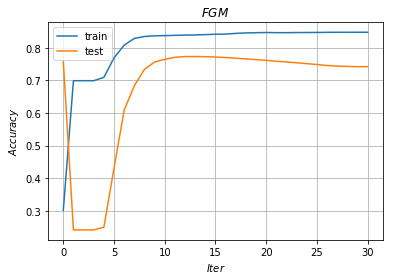

In [268]:
def linear_classify(object_predict, coef):
    if (np.dot(object_predict, coef) > 0):
        return 1
    else:
        return -1
    
def linear_predict(test_objects, coef):
    return np.array([linear_classify(test_objects[i], coef) for i in range(test_objects.shape[0])])
    
def history_FGM_iter(NumIter, x0, f, gradf, *args):
    X, y, L = args
    k = 0
    v_k = copy.deepcopy(x0)
    x_k = copy.deepcopy(x0)
    A_k = 0
    history = np.zeros((NumIter + 1, x0.shape[0]))
    history[0] = x0
    while (k < NumIter):
        print("iter = {0}".format(k))
        a_k = (1 + (1 + 2 * L * A_k)**0.5) / L 
        y_k = (A_k*x_k + a_k*v_k)/(A_k + a_k)
        x_k = y_k - 1/L*gradf(y_k, *(X, y))
        gradf_xk = gradf(x_k, *(X, y))
        v_k = v_k - a_k * gradf_xk
        A_k = A_k + a_k
        k += 1
        history[k] = x_k
    return history

features_extended = features + 1
w0 = np.zeros(features_extended)
NumIter = 30
accuracy_array_train = np.zeros(NumIter + 1)
accuracy_array_test = np.zeros(NumIter + 1)

train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))
L = L2_upper_bound(train_extended_object)

args = (train_extended_object, train_ans, L)
history_fgm = history_FGM_iter(NumIter, w0, logistic_loss, grad_logistic_loss, *args)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_fgm[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_fgm[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test[i] = accuracy_test
    
fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$FGM$') 
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train, label = 'train')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test, label = 'test')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_FGM.pdf')

# Метод Нестерова 2-го порядка + сопряжённые градиенты

iter = 0
         Current function value: -1666.176231
         Iterations: 12
         Function evaluations: 86
         Gradient evaluations: 74
iter = 1
Optimization terminated successfully.
         Current function value: -751.832851
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 2
Optimization terminated successfully.
         Current function value: -482.493723
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 3
Optimization terminated successfully.
         Current function value: -341.057165
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 4
Optimization terminated successfully.
         Current function value: -246.160069
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 5
Optimization terminated successfully.
         Current function value: -180.330471
         Iterations: 12
 

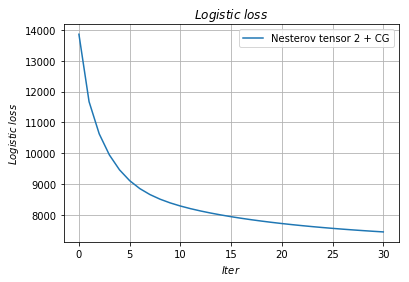

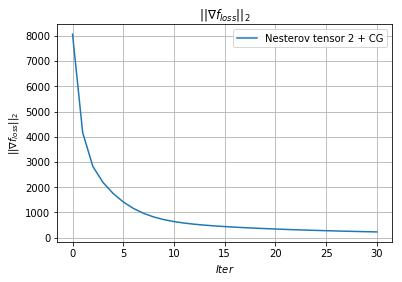

In [251]:
from scipy import optimize

def Nesterov_approx_2_f(y, *args):
    x, grad_f, hessian_f, L = args
    return (L/3*linalg.norm(y - x)**3 + np.dot(grad_f, y - x) + 
                                1/2*np.dot(np.dot(hessian_f, y - x), y - x))

def Nesterov_approx_2_gradf(y, *args):
    x, grad_f, hessian_f, L = args
    return (L*linalg.norm(y - x)*(y - x) + grad_f + 
                                                np.dot(hessian_f, y - x))

def Nesterov_tensor_2_step_cg(x_start_step, NumIterCG, *args):
    grad_f, hessian_f, args_for_x, L = args
    grad_f_current = grad_f(x_start_step, *args_for_x)
    hessian_f_current = hessian_f(x_start_step, *args_for_x)
    args_for_step = (x_start_step, grad_f_current, hessian_f_current, L)
    xopt = optimize.fmin_cg(Nesterov_approx_2_f, x_start_step, fprime=Nesterov_approx_2_gradf,
                                                            args=args_for_step, maxiter = NumIterCG)
    return xopt

def CG_Nesterov_tensor_2_solver(x0, NumIter, NumIterCG, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(grad_f(x_k, *(X, y)))
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_cg(x_k, NumIterCG, *(grad_f, hessian_f, (X, y), L))
        gradf_xk = grad_f(x_k, *(X, y))
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr
    
train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))

features_num = features + 1
w0 = np.zeros(features_num)
NumIter = 30
NumIterCG = 100
L = L3_upper_bound(train_extended_object)

args = (train_extended_object, train_ans)
xans_nesterov_t2, farr_nesterov_t2, fgradarr_nesterov_t2 = CG_Nesterov_tensor_2_solver(w0, NumIter, NumIterCG, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)
fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Logistic \; loss$') 
plt.title(r'$Logistic \; loss$') 
plt.plot([i for i in range(NumIter + 1)], farr_nesterov_t2, label = 'Nesterov tensor 2 + CG')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_Nesterov_tensor_2_CG_f_iter.pdf')
plt.show()

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$||\nabla f_{loss}||_2$') 
plt.title(r'$||\nabla f_{loss}||_2$') 
plt.plot([i for i in range(NumIter + 1)], fgradarr_nesterov_t2, label = 'Nesterov tensor 2 + CG')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_Nesterov_tensor_2_CG_f_iter.pdf')
plt.show()

iter = 0
         Current function value: -1666.176231
         Iterations: 12
         Function evaluations: 86
         Gradient evaluations: 74
iter = 1
Optimization terminated successfully.
         Current function value: -751.832851
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 2
Optimization terminated successfully.
         Current function value: -482.493723
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 3
Optimization terminated successfully.
         Current function value: -341.057165
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 4
Optimization terminated successfully.
         Current function value: -246.160069
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 5
Optimization terminated successfully.
         Current function value: -180.330471
         Iterations: 12
 

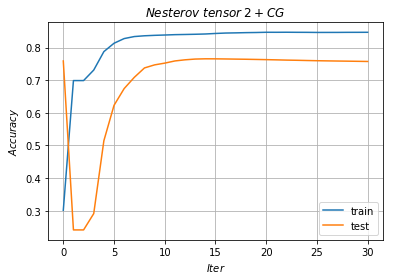

In [270]:
def hist_CG_Nesterov_tensor_2_solver(x0, NumIter, NumIterCG, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    history = []
    history.append(x_k)
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_cg(x_k, NumIterCG, *(grad_f, hessian_f, (X, y), L))
        k += 1
        history.append(x_k)
    return history

features_extended = features + 1
w0 = np.zeros(features_extended)
NumIter = 30
accuracy_array_train = np.zeros(NumIter + 1)
accuracy_array_test = np.zeros(NumIter + 1)

train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))
L = L3_upper_bound(train_extended_object)    

args = (train_extended_object, train_ans)
history_CG_Nesterov_tensor_2 = hist_CG_Nesterov_tensor_2_solver(w0, NumIter, NumIterCG, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test[i] = accuracy_test
    
fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$Nesterov \; tensor \; 2 + CG$') 
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train, label = 'train')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test, label = 'test')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_CG_Nesterov_tensor_2.pdf')

# Метод Нестерова 2-го порядка + LBFGS

iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


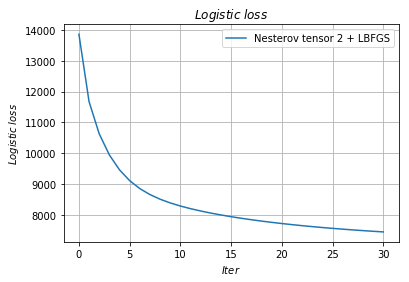

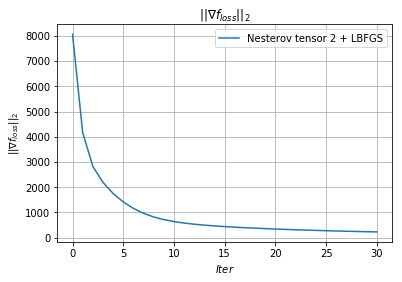

In [293]:
from scipy import optimize

def Nesterov_approx_2_f(y, *args):
    x, grad_f, hessian_f, L = args
    return (L/3*linalg.norm(y - x)**3 + np.dot(grad_f, y - x) + 
                                1/2*np.dot(np.dot(hessian_f, y - x), y - x))

def Nesterov_approx_2_gradf(y, *args):
    x, grad_f, hessian_f, L = args
    return (L*linalg.norm(y - x)*(y - x) + grad_f + 
                                                np.dot(hessian_f, y - x))

def Nesterov_tensor_2_step_lbfgs(x_start_step, NumIterLBFGS, *args):
    grad_f, hessian_f, args_for_x, L = args
    grad_f_current = grad_f(x_start_step, *args_for_x)
    hessian_f_current = hessian_f(x_start_step, *args_for_x)
    args_for_step = (x_start_step, grad_f_current, hessian_f_current, L)
    xopt = optimize.fmin_l_bfgs_b(Nesterov_approx_2_f, x_start_step, fprime=Nesterov_approx_2_gradf,
                                                                  args=args_for_step, maxiter = NumIterLBFGS)
    return xopt[0]

def LBFGS_Nesterov_tensor_2_solver(x0, NumIter, NumIterLBFGS, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(grad_f(x_k, *(X, y)))
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_lbfgs(x_k, NumIterLBFGS, *(grad_f, hessian_f, (X, y), L))
        gradf_xk = grad_f(x_k, *(X, y))
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr
    
train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))

features_num = features + 1
w0 = np.zeros(features_num)
NumIter = 30
NumIterLBFGS = 100
L = L3_upper_bound(train_extended_object)

args = (train_extended_object, train_ans)
xans_nesterov_t2, farr_nesterov_t2, fgradarr_nesterov_t2 = LBFGS_Nesterov_tensor_2_solver(w0, NumIter, NumIterLBFGS, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)
fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Logistic \; loss$') 
plt.title(r'$Logistic \; loss$') 
plt.plot([i for i in range(NumIter + 1)], farr_nesterov_t2, label = 'Nesterov tensor 2 + LBFGS')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_Nesterov_tensor_2_LBFGS_f_iter.pdf')
plt.show()

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$||\nabla f_{loss}||_2$') 
plt.title(r'$||\nabla f_{loss}||_2$') 
plt.plot([i for i in range(NumIter + 1)], fgradarr_nesterov_t2, label = 'Nesterov tensor 2 + LBFGS')
plt.legend()
plt.grid(True) 
fig.savefig('log_loss_Nesterov_tensor_2_LBFGS_f_iter.pdf')
plt.show()

iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


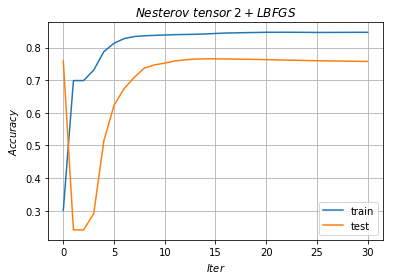

In [294]:
def hist_LBFGS_Nesterov_tensor_2_solver(x0, NumIter, NumIterLBFGS, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    history = []
    history.append(x_k)
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_lbfgs(x_k, NumIterLBFGS, *(grad_f, hessian_f, (X, y), L))
        k += 1
        history.append(x_k)
    return history

features_extended = features + 1
w0 = np.zeros(features_extended)
NumIter = 30
accuracy_array_train = np.zeros(NumIter + 1)
accuracy_array_test = np.zeros(NumIter + 1)

train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))
L = L3_upper_bound(train_extended_object)    

args = (train_extended_object, train_ans)
history_LBFGS_Nesterov_tensor_2 = hist_LBFGS_Nesterov_tensor_2_solver(w0, NumIter, NumIterLBFGS, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_LBFGS_Nesterov_tensor_2[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_LBFGS_Nesterov_tensor_2[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test[i] = accuracy_test
    
fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$Nesterov \; tensor \; 2 + LBFGS$') 
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train, label = 'train')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test, label = 'test')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_LBFGS_Nesterov_tensor_2.pdf')

# Сравнение всех методов

         Current function value: -1666.176231
         Iterations: 12
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: -751.832851
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: -482.493723
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: -341.057165
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: -246.160069
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: -180.330471
         Iterations: 12
         Function evaluations: 26
         Gradient eva

/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 1


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 2


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 3


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 4


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 5


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 6


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 7


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 8


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 9


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 10


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 11


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 12


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 13


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 14


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 15


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 16


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 17


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 18


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 19


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 20


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 21


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 22


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 23


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29
iter = 30
Закончили LogRegr


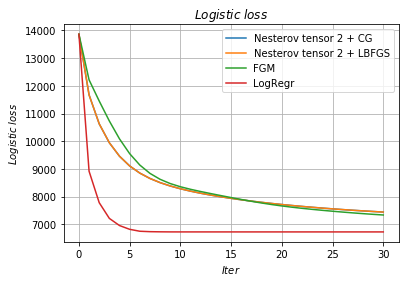

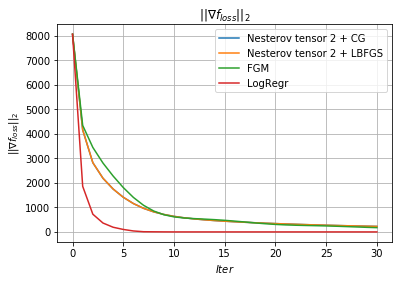

In [301]:
def CG_Nesterov_tensor_2_solver(x0, NumIter, NumIterCG, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(grad_f(x_k, *(X, y)))
    while (k < NumIter):
        x_k = Nesterov_tensor_2_step_cg(x_k, NumIterCG, *(grad_f, hessian_f, (X, y), L))
        gradf_xk = grad_f(x_k, *(X, y))
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr

def LBFGS_Nesterov_tensor_2_solver(x0, NumIter, NumIterLBFGS, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(grad_f(x_k, *(X, y)))
    while (k < NumIter):
        x_k = Nesterov_tensor_2_step_lbfgs(x_k, NumIterLBFGS, *(grad_f, hessian_f, (X, y), L))
        gradf_xk = grad_f(x_k, *(X, y))
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr

def FGM_iter(NumIter, x0, f, gradf, *args):
    X, y, L = args
    k = 0
    v_k = copy.deepcopy(x0)
    x_k = copy.deepcopy(x0)
    A_k = 0
    farr = np.zeros(NumIter + 1)
    fgradarr = np.zeros(NumIter + 1)
    farr[0] = f(x_k, *(X, y))
    fgradarr[0] = linalg.norm(gradf(x_k, *(X, y)))
    while (k < NumIter):
        a_k = (1 + (1 + 2 * L * A_k)**0.5) / L 
        y_k = (A_k*x_k + a_k*v_k)/(A_k + a_k)
        x_k = y_k - 1/L*gradf(y_k, *(X, y))
        gradf_xk = gradf(x_k, *(X, y))
        v_k = v_k - a_k * gradf_xk
        A_k = A_k + a_k
        k += 1
        farr[k] = f(x_k, *(X, y))
        fgradarr[k] = linalg.norm(gradf_xk)
    return x_k, farr, fgradarr



train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))

features_num = features + 1
w0 = np.zeros(features_num)
NumIter = 30
NumIterCG = 100
NumIterLBFGS
L = L3_upper_bound(train_extended_object)

args = (train_extended_object, train_ans)
xans_cg, farr_cg, fgradarr_cg = CG_Nesterov_tensor_2_solver(w0, NumIter, NumIterCG, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)

print("Закончили CG")

xans_lbfgs, farr_lbfgs, fgradarr_lbfgs = LBFGS_Nesterov_tensor_2_solver(w0, NumIter, NumIterLBFGS, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)

print("Закончили LBFGS")

L = L2_upper_bound(train_extended_object)

args = (train_extended_object, train_ans, L)
xans_fgm, farr_fgm, fgradarr_fgm = FGM_iter(NumIter, w0, logistic_loss, grad_logistic_loss, *args)

print("Закончили FGM")

accuracy_array_train = np.zeros(NumIter + 1)
accuracy_array_test = np.zeros(NumIter + 1)
logistic_loss_train = np.zeros(NumIter + 1)
norm_grad_loss_train = np.zeros(NumIter + 1)

for i in range(NumIter + 1):
    print("iter = {0}".format(i))
    log_reg = LogisticRegression(solver = 'liblinear', tol = 1e-10, C = 100000000, max_iter = i)
    log_reg.fit(train_object, train_ans)
    
    coef = log_reg.coef_
    bias = log_reg.intercept_
    coef = np.append(coef, bias)

    train_args = (train_extended_object, train_ans)
    logistic_loss_train[i] = logistic_loss(coef, *train_args)
    norm_grad_loss_train[i] = linalg.norm(grad_logistic_loss(coef, *train_args))
    
    train_ans_predict = log_reg.predict(train_object)
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train[i] = accuracy_train

    test_ans_predict = log_reg.predict(test_object)
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test[i] = accuracy_test

print("Закончили LogRegr")

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Logistic \; loss$') 
plt.title(r'$Logistic \; loss$') 
plt.plot([i for i in range(NumIter + 1)], farr_cg, label = 'Nesterov tensor 2 + CG')
plt.plot([i for i in range(NumIter + 1)], farr_lbfgs, label = 'Nesterov tensor 2 + LBFGS')
plt.plot([i for i in range(NumIter + 1)], farr_fgm, label = 'FGM')
plt.plot([i for i in range(NumIter + 1)], logistic_loss_train, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('all_f_iter.pdf')
plt.show()

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$||\nabla f_{loss}||_2$') 
plt.title(r'$||\nabla f_{loss}||_2$') 
plt.plot([i for i in range(NumIter + 1)], fgradarr_cg, label = 'Nesterov tensor 2 + CG')
plt.plot([i for i in range(NumIter + 1)], fgradarr_lbfgs, label = 'Nesterov tensor 2 + LBFGS')
plt.plot([i for i in range(NumIter + 1)], fgradarr_fgm, label = 'FGM')
plt.plot([i for i in range(NumIter + 1)], norm_grad_loss_train, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('all_gradf_iter.pdf')
plt.show()

In [296]:
farr_cg

array([13862.9436112 , 11672.89709942, 10627.36108022,  9943.2173093 ,
        9457.69900082,  9106.55458729,  8848.53787221,  8654.46435211,
        8503.92228927,  8383.00305819,  8282.46831016,  8196.30618549,
        8120.64791133,  8052.99963086,  7991.72715847,  7935.72613206,
        7884.21802733,  7836.62688554,  7792.5057485 ,  7751.49290347,
        7713.28567468,  7677.62443113,  7644.28251631,  7613.05962714,
        7583.77723854,  7556.27525527,  7530.40945999,  7506.04948044,
        7483.07712706,  7461.38500477,  7440.87533627])

In [297]:
farr_lbfgs

array([13862.9436112 , 11672.89706404, 10627.36091105,  9943.2162968 ,
        9457.69821564,  9106.55429763,  8848.53787803,  8654.4645924 ,
        8503.92255925,  8383.00325115,  8282.46864943,  8196.30654998,
        8120.64827616,  8052.999994  ,  7991.72760374,  7935.72668196,
        7884.21864955,  7836.62751408,  7792.50643009,  7751.49363828,
        7713.2864442 ,  7677.62522828,  7644.28333322,  7613.06045881,
        7583.77807984,  7556.27610303,  7530.41031153,  7506.05033334,
        7483.07797917,  7461.38585415,  7440.87618121])

In [303]:
def hist_LBFGS_Nesterov_tensor_2_solver(x0, NumIter, NumIterLBFGS, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    history = []
    history.append(x_k)
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_lbfgs(x_k, NumIterLBFGS, *(grad_f, hessian_f, (X, y), L))
        k += 1
        history.append(x_k)
    return history

def hist_CG_Nesterov_tensor_2_solver(x0, NumIter, NumIterCG, f, grad_f, hessian_f, L, *args):
    X, y = args
    k = 0
    x_k = copy.deepcopy(x0)
    history = []
    history.append(x_k)
    while (k < NumIter):
        print("iter = {0}".format(k))
        x_k = Nesterov_tensor_2_step_cg(x_k, NumIterCG, *(grad_f, hessian_f, (X, y), L))
        k += 1
        history.append(x_k)
    return history

def history_FGM_iter(NumIter, x0, f, gradf, *args):
    X, y, L = args
    k = 0
    v_k = copy.deepcopy(x0)
    x_k = copy.deepcopy(x0)
    A_k = 0
    history = np.zeros((NumIter + 1, x0.shape[0]))
    history[0] = x0
    while (k < NumIter):
        print("iter = {0}".format(k))
        a_k = (1 + (1 + 2 * L * A_k)**0.5) / L 
        y_k = (A_k*x_k + a_k*v_k)/(A_k + a_k)
        x_k = y_k - 1/L*gradf(y_k, *(X, y))
        gradf_xk = gradf(x_k, *(X, y))
        v_k = v_k - a_k * gradf_xk
        A_k = A_k + a_k
        k += 1
        history[k] = x_k
    return history

features_extended = features + 1
w0 = np.zeros(features_extended)
NumIter = 30
NumIterCG = 100
NumIterLBFGS = 100
accuracy_array_train = np.zeros(NumIter + 1)
accuracy_array_test = np.zeros(NumIter + 1)

train_const_feature = np.array([np.array([1]) for i in range(train_object_size)]) #добавим фиктивный признак
train_extended_object = copy.deepcopy(train_object)
train_extended_object = np.column_stack((train_extended_object, train_const_feature[:, 0]))
L = L3_upper_bound(train_extended_object)    

args = (train_extended_object, train_ans)
history_CG_Nesterov_tensor_2 = hist_CG_Nesterov_tensor_2_solver(w0, NumIter, NumIterCG, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)

print("Закончили CG")

history_LBFGS_Nesterov_tensor_2 = hist_LBFGS_Nesterov_tensor_2_solver(w0, NumIter, NumIterLBFGS, 
                                        logistic_loss, grad_logistic_loss, hessian_logistic_loss,  L, *args)


print("Закончили LBFGS")

L = L2_upper_bound(train_extended_object)
args = (train_extended_object, train_ans, L)
history_fgm = history_FGM_iter(NumIter, w0, logistic_loss, grad_logistic_loss, *args)

print("Закончили FGM")

accuracy_array_train_cg = np.zeros(NumIter + 1)
accuracy_array_test_cg = np.zeros(NumIter + 1)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train_cg[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test_cg[i] = accuracy_test
    
accuracy_array_train_lbfgs = np.zeros(NumIter + 1)
accuracy_array_test_lbfgs = np.zeros(NumIter + 1)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train_lbfgs[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_CG_Nesterov_tensor_2[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test_lbfgs[i] = accuracy_test
    
accuracy_array_train_fgm = np.zeros(NumIter + 1)
accuracy_array_test_fgm = np.zeros(NumIter + 1)

for i in range(NumIter + 1):
    train_ans_predict = linear_predict(train_extended_object, history_fgm[i])
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train_fgm[i] = accuracy_train

    test_ans_predict = linear_predict(test_extended_object, history_fgm[i])
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test_fgm[i] = accuracy_test

iter = 0
         Current function value: -1666.176231
         Iterations: 12
         Function evaluations: 86
         Gradient evaluations: 74
iter = 1
Optimization terminated successfully.
         Current function value: -751.832851
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 2
Optimization terminated successfully.
         Current function value: -482.493723
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
iter = 3
Optimization terminated successfully.
         Current function value: -341.057165
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 4
Optimization terminated successfully.
         Current function value: -246.160069
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
iter = 5
Optimization terminated successfully.
         Current function value: -180.330471
         Iterations: 12
 

iter = 0
iter = 1
iter = 2
iter = 3


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 4
iter = 5
iter = 6


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 7
iter = 8


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 9


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 10


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 11


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 12


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 13


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 14


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 15


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 16


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 17


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 18


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 19


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 20


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 21


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 22


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 23


/usr/local/lib64/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29
iter = 30
Закончили LogRegr


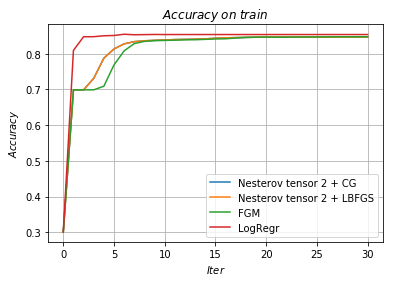

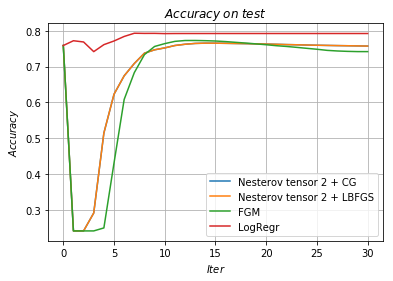

In [307]:
accuracy_array_train_logreg = np.zeros(NumIter + 1)
accuracy_array_test_logreg = np.zeros(NumIter + 1)

for i in range(NumIter + 1):
    print("iter = {0}".format(i))
    log_reg = LogisticRegression(solver = 'liblinear', tol = 1e-10, C = 100000000, max_iter = i)
    log_reg.fit(train_object, train_ans)

    train_ans_predict = log_reg.predict(train_object)
    accuracy_train = accuracy_score(train_ans, train_ans_predict)
    accuracy_array_train_logreg[i] = accuracy_train

    test_ans_predict = log_reg.predict(test_object)
    accuracy_test = accuracy_score(test_ans, test_ans_predict)
    accuracy_array_test_logreg[i] = accuracy_test

print("Закончили LogRegr")

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$Accuracy \; on \; train$') 
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train_cg, label = 'Nesterov tensor 2 + CG')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train_lbfgs, label = 'Nesterov tensor 2 + LBFGS')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train_fgm, label = 'FGM')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_train_logreg, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_all_train.pdf')

fig = plt.figure()
plt.xlabel(r'$Iter$') 
plt.ylabel(r'$Accuracy$') 
plt.title(r'$Accuracy \; on \; test$') 
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test_cg, label = 'Nesterov tensor 2 + CG')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test_lbfgs, label = 'Nesterov tensor 2 + LBFGS')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test_fgm, label = 'FGM')
plt.plot([i for i in range(NumIter + 1)], accuracy_array_test_logreg, label = 'LogRegr')
plt.legend()
plt.grid(True) 
fig.savefig('accuracy_all_test.pdf')